# Transformer Architecture

This a brief review of the transformer architecture following [Lecture
17 -
Attention](https://web.eecs.umich.edu/~justincj/slides/eecs498/WI2022/598_WI2022_lecture17.pdf)
by Justin Johnson, [Chapter 9 - The
Transformer](https://web.stanford.edu/~jurafsky/slp3/9.pdf), and the
[Transformer
architecture](https://github.com/stanford-cs336/spring2025-lectures/blob/e9cb2488fdb53ea37f0e38924ec3a1701925cef3/nonexecutable/2025%20Lecture%203%20-%20architecture.pdf)
lecture in Stanford’s CS336. It will cover attention, the transformer
block, and the decoder-only transformer architecture, from the early
2000s to recent improvements. Other useful references include
[Transformers from scratch](https://peterbloem.nl/blog/transformers) by
Peter Bleom, Harvard’s [The annotated
transformer](https://nlp.seas.harvard.edu/annotated-transformer/),
Lilian Weng’s blog on [The Transformer
V2](lilianweng.github.io/posts/2023-01-27-the-transformer-family-v2/),
Xavier Amatriain’s [Transformer models: an introduction and
catalog — 2023
Edition](https://amatria.in/blog/transformer-models-an-introduction-and-catalog-2d1e9039f376/),
and Sebastian Raschka’s posts on the transformer, including [The Big LLM
Architecture
Comparison](https://magazine.sebastianraschka.com/p/the-big-llm-architecture-comparison).

## Attention

First $L$ tokens are embedded into a vector space of dimension
$d_{model}$ to give a matrix

$$
  X : L \times d_{model}
$$

The dimensions $L$ and $d_{model}$ are important for all transformer
architectures. $L$ is the *context length* of the model controlling the
length of the text sequences visible to the model, and $d_{model}$ is
the *embedding dimension* controlling the capacity of the model.

The attention mechanism uses the following weight matricies:

$$W_K : d_{model} \times d_{k}$$ $$W_Q : d_{model} \times d_{k}$$
$$W_V : d_{model} \times d_{v}$$

The query, key, and value matrices are then defined by:

$$Q = X W_Q$$ $$K = X W_K$$ $$V = X W_V$$

The similarity matrix $E$ is defined by:

$$E = \frac{Q K^T}{\sqrt{d_K}} : L \times L$$

The softmax is then applied over the key dimension (dimension $1$) to
give the attention matrix $A$:

$$A = \operatorname{softmax}(E, \dim =1) : L \times L$$

The output matrix $O$ is then defined by:

$$Y = A V : L \times d_{v}$$

This gives one attention head $h_i$ for $i = 1,..,h$. Specifically,

$$ \operatorname{head}_i = \operatorname{Attention}(X W_i^Q,X W_i^K, X W_i^V)  $$

The final output is

$$ \operatorname{MultiHead}(Q,K,V) = \operatorname{Concat}(\operatorname{head}_1,...,\operatorname{head}_h) W^O $$

where $\operatorname{Concat}$ is done along the embedding dimension and
$W_O$ has shape $h d_v \times d_{model}$.

The $\operatorname{Attention}$ block is the essence of the transformer
architecture, and is largely unchanged to this day. Its main limitation
is that it has computational complexity $O(L^2 d_{model})$ which makes
it difficult to evaluate for long contexts. Much work has gone into
reducing the $L^2$ complexity, including Grouped Query Attention, which
is common today.

### Cross-attention

This layer was used in the original transformer paper, to connect the
encoder output with the decoder branch, and is still used today, for
example, to make [multimodal
LLMs](https://magazine.sebastianraschka.com/p/understanding-multimodal-llms)
such as Llama 3.2.

$X_1 : L_1 \times d_{model}$ (from the decoder)

$X_2 : L_2 \times d_{model}$ (from the encoder)

Notice that the embedding dimension for $X_1$ and $X_2$ are the same.
The weight matrices are:

$$W_K : d_{model} \times d_{k}$$ $$W_Q : d_{model} \times d_{k}$$
$$W_V : d_{model} \times d_{v}$$

The query, key, and value matrices in cross-attention are:

$$Q = X_1 W_Q$$ $$K = X_2 W_K$$ $$V = X_2 W_V$$

The main difference now is that the similarity matrix $E$ defined
earlier has dimension $L_1 \times L_2$.

### Self-attention in vector form

The vector formulation of attention is easier to understand. First
define the query, key, and value vectors as follows:

$q_m$ are query vectors for $m=1,...,L$

$k_n$ are key vectors for $n=1,...,L$

$v_n$ are value vectors for $n=1,...,L$

Then the $m,n$ entry of the attention matrix is given by:

$$a_{m,n} = \frac{\exp\left(\frac{q_m^T k_n}{\sqrt{d_k}}\right)}{\sum_{j=1}^N \exp\left(\frac{q_m^T k_j}{\sqrt{d_k}}\right)}$$

## Transformer block

[Transformer
block](https://web.stanford.edu/~jurafsky/slp3/slides/transformer24aug.pdf)
(equations move forward from top to bottom) mapping
$h_{l-1} \in \mathbb{R}^{L\times d_{model}}$ to
$\mathbb{R}^{L\times d_{model}}$ is: 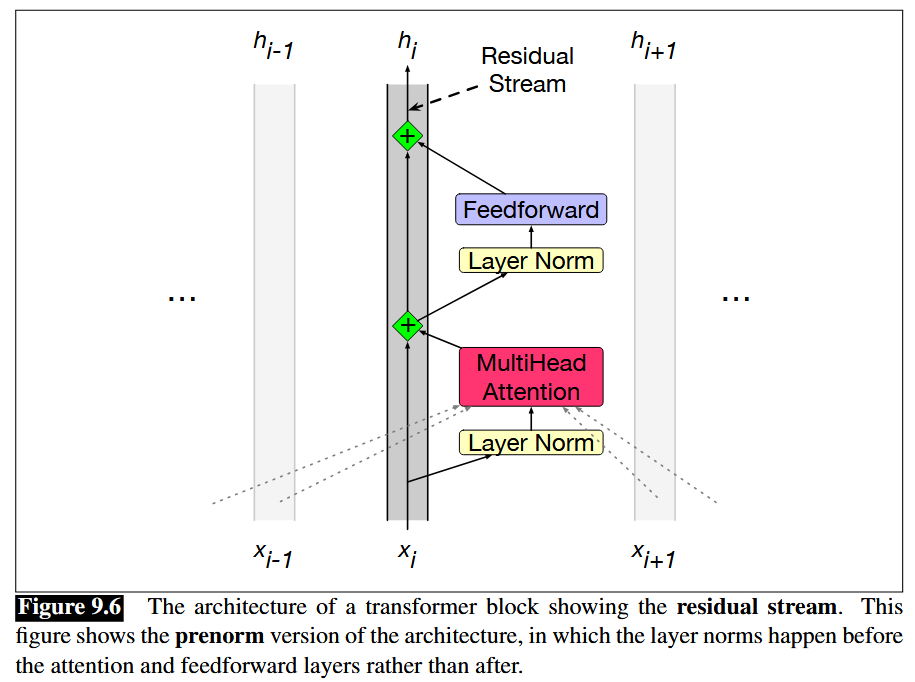

### Contemporary improvements

## Decoder transformer architecture

## References